# Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la url siguiente: https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'

res_coches = requests.get(url_coches)
res_coches.status_code

200

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasión y seminuevos | OcasionPlus</title><meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/><meta class="next-head" content="noindex, follow, noarchive" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon/android-chrome-192x192.png" rel=
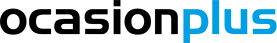

In [6]:
sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')
sopa_coches

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

In [7]:
#nombres de los coches
lista_nombre_coches = sopa_coches.find_all('h2', {'style':"overflow-x:hidden"})
lista_nombre_coches
nombre_coches = []
for coche in lista_nombre_coches:
    nombre_coches.append(coche.text)
nombre_coches    

['Skoda Kamiq 1.0 TSI Ambition  (110 CV)',
 'Peugeot 2008 SUV SUV BlueHDi 100 Signature (100 CV)',
 'Mercedes-Benz Clase CLA Shooting Brake (122 CV)',
 'Renault Grand Scenic Limited Blue dCi (120 CV) 7 PLAZAS',
 'BMW Serie 5 BMW Serie 5 520d Touring 140 kW (190 CV',
 'Kia Stonic 1.0 T-GDi Eco-Dynamic Drive (120 CV)',
 'Mercedes-Benz Clase GLB MERCEDES GLB 2.0 200 D DCT (150CV) PAQUETE AMG',
 'Fiat 500X 1.3 MultiJet Mirror 4x2 (95 CV)',
 'Chevrolet Cruze 2.0 VCDI LS  (125 CV)',
 'SEAT Arona 1.0 TSI (115CV) FR Ecomotive',
 'Honda Civic 1.4 I-VTEC Comfort (100 CV)',
 'Toyota Yaris 1.0 City (69 CV)',
 'Citroen C3 PureTech 82 Feel (83 CV)',
 'SEAT Ibiza S&S Reference Plus (80 CV)',
 'Peugeot 308 SW SW BlueHDi 130 S&S Active Pack  (130 CV)',
 'Nissan X-Trail 2.0 dCi N-Connecta 4x2 XTronic Auto (177 CV)',
 'Citroen C5 Aircross 30 S&S Shine (131 CV)',
 'Ford Focus 1.6 TDCI Trend  (115 CV)',
 'Citroen C3 Aircross PureTech 110 S&S Feel (110 CV)',
 'Kia Soul 1.6 CRDi Concept Eco-Dynamics (136 CV)

In [8]:
#los precios rebajados
lista_precio_r_coches = sopa_coches.find_all('span', {'class':"jsx-2689423372 price"})

precio_r_coches = []
for precio in lista_precio_r_coches:
    precio_r_coches.append(precio.text)
precio_r_coches

['20.818€',
 '12.909€',
 '28.000€',
 '21.727€',
 '30.818€',
 '15.318€',
 '39.000€',
 '14.136€',
 '5.300€',
 '15.445€',
 '12.990€',
 '10.227€',
 '8.627€',
 '11.727€',
 '14.364€',
 '21.682€',
 '19.773€',
 '7.200€',
 '12.545€',
 '12.545€']

In [9]:
# los precios originales {'class':"jsx-2689423372 price"}
lista_precio_o_coches = sopa_coches.find_all('span', {'class' : "jsx-2870186023 priceLast"})
lista_precio_o_coches
precio_o_coches = []
for precio in lista_precio_o_coches:
    precio_o_coches.append(precio.text)
precio_o_coches

['22.900€',
 '14.200€',
 '30.800€',
 '23.900€',
 '33.900€',
 '16.850€',
 '42.900€',
 '15.550€',
 '16.990€',
 '11.250€',
 '9.490€',
 '12.900€',
 '15.800€',
 '23.850€',
 '21.750€',
 '13.800€',
 '13.800€']

In [10]:
#información de los kilómetros
lista_km_coches = sopa_coches.find_all('span', {'class' : "jsx-3960002075 detail big"})
km_coches = []
for km in lista_km_coches:    
    km_coches.append(km.text)
km_coches

['01/2023',
 '11.151 km',
 'Gasolina',
 'Manual',
 'Garantía oficial: Febrero 2025',
 '07/2019',
 '52.846 km',
 'Diésel',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 '02/2019',
 '56.126 km',
 'Gasolina',
 'Automático',
 'Único propietario',
 '09/2019',
 '60.828 km',
 'Diésel',
 'Manual',
 '03/2021',
 '68.564 km',
 'Híbrido',
 'Automático',
 'Libro Mantenimiento',
 'Único propietario',
 '03/2018',
 '36.395 km',
 'Gasolina',
 'Manual',
 'Único propietario',
 'Garantía oficial: Abril 2025',
 '02/2021',
 '58.565 km',
 'Diésel',
 'Automático',
 'Libro Mantenimiento',
 'Único propietario',
 '08/2018',
 '80.787 km',
 'Diésel',
 'Manual',
 '02/2010',
 '162.006 km',
 'Diésel',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 '09/2019',
 '48.954 km',
 'Gasolina',
 'Manual',
 '06/2013',
 '97.531 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '07/2017',
 '53.529 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '05/2017',
 '128.270 km',
 'Gasolina',
 'Manual',
 'L

In [11]:
km_coches_ok = []
for km in km_coches:
    lista_km = re.findall('\d+\.\d+\skm', km)
    if len(lista_km) >= 1:
       km_coches_ok.append(km)

km_coches_ok      

['11.151 km',
 '52.846 km',
 '56.126 km',
 '60.828 km',
 '68.564 km',
 '36.395 km',
 '58.565 km',
 '80.787 km',
 '162.006 km',
 '48.954 km',
 '97.531 km',
 '53.529 km',
 '128.270 km',
 '25.304 km',
 '85.643 km',
 '97.343 km',
 '44.866 km',
 '145.688 km',
 '62.524 km',
 '73.833 km']

In [12]:
print('nombres', len(lista_nombre_coches))
print('precio r', len(lista_precio_r_coches))
print('precio o', len(lista_precio_o_coches))
print('km', len(km_coches_ok))


nombres 20
precio r 20
precio o 17
km 20


In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

def scrape_coches_ocasion(url):

    res_coches = requests.get(url)
    print(f"Respuesta: {res_coches.status_code}")
    if res_coches.status_code == 200:
        print("OK")
    else:
        print(f"Error: {res_coches.reason}")
        return None    

    sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')

    #nombres de los coches
    lista_nombre_coches = sopa_coches.find_all('h2', {'style':"overflow-x:hidden"})
    nombre_coches = []
    for coche in lista_nombre_coches:
        nombre_coches.append(coche.text)

    #los precios rebajados
    lista_precio_r_coches = sopa_coches.find_all('span', {'class':"jsx-2689423372 price"})

    precio_r_coches = []
    for precio in lista_precio_r_coches:
        precio_r_coches.append(precio.text)

    # los precios originales {'class':"jsx-2689423372 price"}
    lista_precio_o_coches = sopa_coches.find_all('span', {'class' : "jsx-2870186023 priceLast"})

    precio_o_coches = []
    for precio in lista_precio_o_coches:
        precio_o_coches.append(precio.text)

    #información de los kilómetros
    lista_km_coches = sopa_coches.find_all('span', {'class' : "jsx-3960002075 detail big"})
    km_coches = []
    for km in lista_km_coches:    
        km_coches.append(km.text)

    km_coches_ok = []
    for km in km_coches:
        lista_km = re.findall('\d+\.\d+\skm', km)
        if len(lista_km) >= 1:
            km_coches_ok.append(km)

    diccionario = {"nombre" : [], "precio rebajado": [], "precio original" : [], "km": []}
    lista_elementos = [nombre_coches, precio_r_coches, precio_o_coches, km_coches_ok]

    for indice, valor in enumerate(nombre_coches):
        diccionario["nombre"] = nombre_coches[indice]  
        diccionario["precio rebajado"] = precio_r_coches[indice]  
        diccionario["precio original"] = precio_o_coches[indice]  
        diccionario["km"] = km_coches_ok[indice]  

    df = pd.DataFrame(diccionario)
    
    return df   

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:
- "coche": Nombres de los coches.
- "precio_rebajado": Precios rebajados.
- "precio_original": Precios originales.
- "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este:
Coche
Precio Rebajado
Precio Original
Kilómetros
Toyota Corolla 140H Active Plus Auto (140 CV)
25.273€
27.800€
2.839 km
Ford Focus 1.0 Ecoboost S&S Titanium Auto (125...
17.354€
19.090€
37.479 km
Hyundai Santa Fe 2.0 CRDI Essence 4x2 7 Plazas...
21.363€
23.500€
51.690 km
Audi A3 Sportback Sportback 1.6 TDI (116 CV)
17.727€
19.500€
66.918 km
Hyundai Tucson 1.6 TGDI (177CV) Tecno Sky Safe...
23.954€
26.350€
32.183 km
Jeep Renegade 1.0G 80 Aniversario 4x2 (120 CV)
18.636€
20.500€
60.279 km
Renault Captur Zen Energy TCe (120 CV)
14.727€
16.200€
25.316 km
Audi A1 Sportback 25 TFSI (95 CV)
14.363€
15.800€
65.520 km
Citroen C4 Cactus PureTech 110 S&S
15.082€
16.590€
35.116 km
Shine Pack ...
Kia Sportage GDi Drive 4x2 (132 CV)
17.682€
20.250€
82.460 km
Dacia Sandero Serie Limitada Xplore TCe (90 CV)
12.718€
13.990€
82.414 km
SEAT Ateca 1.4 EcoTSI S&S Xcellence (150 CV)
21.363€
23.500€
40.859 km
Peugeot 208 PEUGEOT 208 PureTech 73kW (100CV) GT
17.818€
19.600€
22.180 km
Mercedes-Benz Clase CLA CLA 200 (163 CV) PACK AMG
30.681€
33.750€
61.658 km
Peugeot 208 PureTech 100 GT (100 CV)
17.772€
19.550€
23.631 km
Opel Astra 1.5 D GS Line (122 CV)
14.045€
15.450€
71.934 km
SEAT Leon 2.0 TDI S&S Style (115 CV)
20.081€
22.090€
29.035 km
Peugeot 208 PureTech 100 GT (100 CV)
17.681€
19.450€
30.896 km
Opel Mokka X OPEL Mokka X 1.4 T 103kW 4X2 Inno...
14.727€
16.200€
114.422 km
Citroen Berlingo Talla M PureTech 110 S&S SHINE
20.818€
22.900€
49.615 km

In [14]:
url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'

tabla_coches = scrape_coches_ocasion(url_coches)

tabla_coches    

Respuesta: 200
OK


IndexError: list index out of range